In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import random
import sys
from nltk.cluster import euclidean_distance, cosine_distance
np.random
import nltk
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import seaborn as sns; 
from sklearn.metrics import davies_bouldin_score
from scipy.cluster.hierarchy import complete, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import average, dendrogram
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


In [6]:
papers = pd.read_csv('papers.csv', index_col=0)
papers.shape

(105, 4)

In [7]:
papers.head(5)

,paper_title,author_keywords,abstract,session
paper_id,,,,
1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods
2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete Fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods
3,Applying Swarm Ensemble Clustering Technique f...,"Software defect prediction, Particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods
4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods
5,Concept Drift Awareness in Twitter Streams,"Twitter, Adaptation models, Time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods


In [8]:
papers.describe()

,paper_title,author_keywords,abstract,session
count,105,105,105,105
unique,105,105,105,24
top,Improving Named Entity Recognition for Morphol...,"Anytime Algorithm, Nearest Neighbor, Classific...","Consider optimization problems, where a target...",Real-time Systems and Industry
freq,1,1,1,5


In [9]:
papers["keywords_abstract"]= papers["author_keywords"].str.cat(papers['abstract'], sep =" ") 

encoder = preprocessing.LabelEncoder()
encoder.fit(papers['session'])

papers['session_encoded'] = encoder.transform(papers['session'])

In [10]:
papers.head()

,paper_title,author_keywords,abstract,session,keywords_abstract,session_encoded
paper_id,,,,,,
1,Ensemble Statistical and Heuristic Models for ...,"statistical word alignment, ensemble learning,...",Statistical word alignment models need large a...,Ensemble Methods,"statistical word alignment, ensemble learning,...",2
2,Improving Spectral Learning by Using Multiple ...,"representation, spectral learning, discrete Fo...",Spectral learning algorithms learn an unknown ...,Ensemble Methods,"representation, spectral learning, discrete Fo...",2
3,Applying Swarm Ensemble Clustering Technique f...,"Software defect prediction, Particle swarm opt...",Number of defects remaining in a system provid...,Ensemble Methods,"Software defect prediction, Particle swarm opt...",2
4,Reducing the Effects of Detrimental Instances,"filtering, label noise, instance weighting",Not all instances in a data set are equally be...,Ensemble Methods,"filtering, label noise, instance weighting Not...",2
5,Concept Drift Awareness in Twitter Streams,"Twitter, Adaptation models, Time-frequency ana...",Learning in non-stationary environments is not...,Ensemble Methods,"Twitter, Adaptation models, Time-frequency ana...",2


In [11]:
stemmer = SnowballStemmer("english")
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\menar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [12]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(papers['abstract'])

reform_tfidf_matrix = tfidf_matrix.toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [16]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(papers['abstract'])

reform_tfidf_matrix = tfidf_matrix.toarray()


print("Количество уникальных фронтиров:", papers['session'].nunique())
print("\nКоличество уникальных слов: ", reform_tfidf_matrix.shape)
print(tfidf_vectorizer.get_feature_names())


Количество уникальных фронтиров: 24

Количество уникальных слов:  (105, 38)
['accuraci', 'algorithm', 'applic', 'approach', 'base', 'classif', 'classifi', 'compar', 'comput', 'consid', 'data', 'dataset', 'differ', 'effect', 'featur', 'howev', 'improv', 'learn', 'machin', 'machin learn', 'method', 'model', 'network', 'new', 'paper', 'perform', 'present', 'problem', 'process', 'propos', 'provid', 'result', 'set', 'studi', 'techniqu', 'train', 'use', 'work']


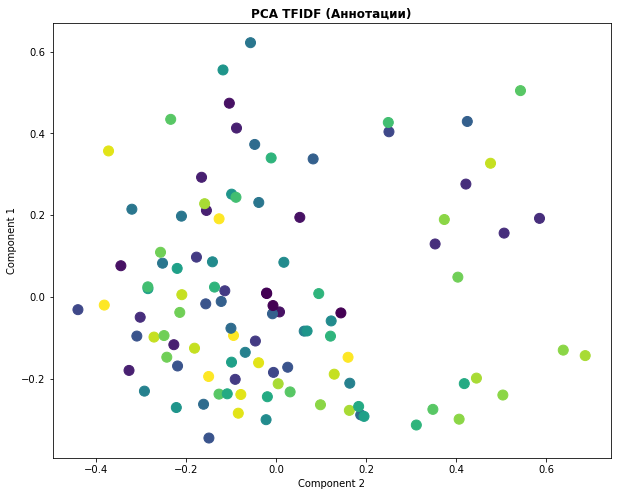

In [23]:
pca = PCA(n_components=2)
comps = pca.fit_transform(reform_tfidf_matrix)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])

plt.figure(figsize=(10,8))
plt.title('PCA TFIDF (Аннотации)', weight='bold')
plt.xlabel('Component 2')
plt.ylabel('Component 1') 
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);

['statistical word alignment, ensemble learning, heuristic word alignment', 'representation, spectral learning, discrete Fourier, basis selection, ensemble', 'Software defect prediction, Particle swarm optimization, Cluster data, Ensemble clustering', 'filtering, label noise, instance weighting', 'Twitter, Adaptation models, Time-frequency analysis, Event detection, Context, Vectors', 'dimensionality reduction, mobile security, android, principal components analysis', 'active learning, semi-supervised learning, audio CAPTCHA, automatic speech recognition', 'Software Architecture, Machine Learning, Q-Learning, Security, Repair', 'Signature,Discretize,Unordered,Classification,Training,Bag-of-pattern', 'abnormal event detection, low-rank approximation, adaptive learning', 'Smart Environment, Activity Recognition, Graph Representation', 'RFE, feature selection, embedded methods, Support Vector Machines, Recursive Feature Addition', 'Object Tracking, Convolutional Neural Network, Feature Le

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


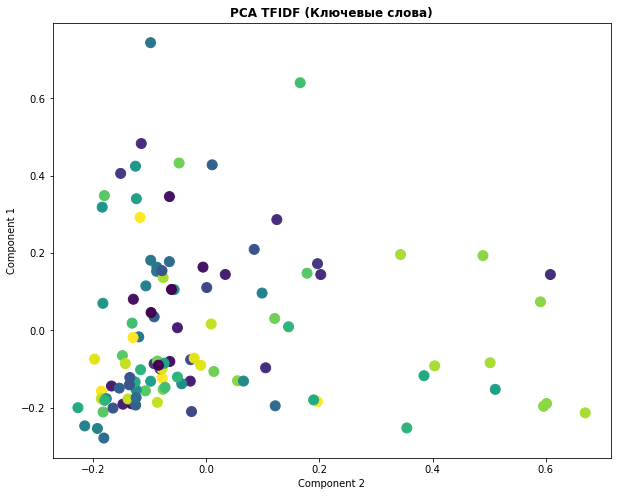

In [24]:
corpus1 = list(papers['author_keywords'])
print(corpus1)

vectorizer = TfidfVectorizer(max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,1))

keyword_idf = vectorizer.fit_transform(corpus1)

# Print unique words
print(vectorizer.get_feature_names())

# keyword_idf is the tfidf of author keywords
keyword_idf = keyword_idf.toarray() #tfidf matrix to be used by the algorithms
print(keyword_idf.shape)

# Visualize paper data using Author keywords in 2 dimension PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
comps = pca.fit_transform(keyword_idf)

new_df = pd.DataFrame(data = comps
             , columns = ['Comp1', 'Comp2'])
plt.figure(figsize=(10,8))
plt.title('PCA TFIDF (Ключевые слова)', weight='bold')
plt.xlabel('Component 2')
plt.ylabel('Component 1') 
plt.scatter(new_df['Comp1'], new_df['Comp2'], c=papers['session_encoded'], s=100);

# K-mean

In [26]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, metric, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X, centers, metric=metric)
        
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [29]:
def inertia(labels, centres, data):
    inertia_total = []
    for i in range(len(data)):
        dif = sum(np.square((data[i]-centers[labels[i]])))
        inertia_total.append(dif)
    return sum(inertia_total)

In [44]:
k = [2, 5, 10, 15, 20, 25]


inertia_scores_euclidean = []
inertia_scores_cosine = []
silhouette_scores_euclidean = []
silhouette_scores_cosine = []

rand_all_euclidean = []
mutual_information_all_euclidean = [] 
norm_mutual_information_all_euclidean = []
homogeneity_all_euclidean = []
completeness_all_euclidean = []
folkes_mallows_score_all_euclidean = []
cal_all_euclidean = []
v_all_euclidean = []

# External measures consine similarity 
rand_all_cosine = []
mutual_information_all_cosine = [] 
norm_mutual_information_all_cosine = []
homogeneity_all_cosine = []
completeness_all_cosine = []
folkes_mallows_score_all_cosine = []
cal_all_cosine = []
v_all_cosine = []

for i in k:
    centers, labels_euclidean = find_clusters(reform_tfidf_matrix, i, 'euclidean')
    score = inertia(labels_euclidean, centers, reform_tfidf_matrix)
    inertia_scores_euclidean.append(score)
    
    sil_score = silhouette_score(reform_tfidf_matrix, labels_euclidean)
    silhouette_scores_euclidean.append(sil_score)
    
    centers, labels_cosine = find_clusters(reform_tfidf_matrix, i, 'cosine')
    score = inertia(labels_cosine, centers, reform_tfidf_matrix)
    inertia_scores_cosine.append(score)
    sil_score = silhouette_score(reform_tfidf_matrix, labels_cosine)
    silhouette_scores_cosine.append(sil_score)
    
    clusters_cal = np.asarray(labels_euclidean).reshape(-1, 1) 
    #cal = metrics.calinski_harabaz_score(clusters_cal, papers['session_encoded']) 
    #cal_all_euclidean.append(cal)
    
    clusters_cal = np.asarray(labels_cosine).reshape(-1, 1) 
    #cal = metrics.calinski_harabaz_score(clusters_cal, papers['session_encoded']) 
    #cal_all_cosine.append(cal)
    
    rand = metrics.adjusted_rand_score(labels_euclidean, papers['session_encoded'])
    rand_all_euclidean.append(rand)
    
    rand = metrics.adjusted_rand_score(labels_cosine, papers['session_encoded'])
    rand_all_cosine.append(rand)
    
    mi = metrics.mutual_info_score(labels_euclidean, papers['session_encoded']) 
    mutual_information_all_euclidean.append(mi)
    
    mi = metrics.mutual_info_score(labels_cosine, papers['session_encoded']) 
    mutual_information_all_cosine.append(mi)
     
    nmi = metrics.normalized_mutual_info_score(labels_euclidean, papers['session_encoded']) 
    norm_mutual_information_all_euclidean.append(nmi)
    
    nmi = metrics.normalized_mutual_info_score(labels_cosine, papers['session_encoded']) 
    norm_mutual_information_all_cosine.append(nmi)
    
    homogeneity = metrics.homogeneity_score(labels_euclidean, papers['session_encoded'])  
    homogeneity_all_euclidean.append(homogeneity)
    
    homogeneity = metrics.homogeneity_score(labels_cosine, papers['session_encoded'])  
    homogeneity_all_cosine.append(homogeneity)
    
    completeness = metrics.completeness_score(labels_euclidean, papers['session_encoded'])
    completeness_all_euclidean.append(completeness)
    
    completeness = metrics.completeness_score(labels_cosine, papers['session_encoded'])
    completeness_all_cosine.append(completeness)
    
    v = metrics.v_measure_score(labels_euclidean, papers['session_encoded'])
    v_all_euclidean.append(v)
    
    v = metrics.v_measure_score(labels_cosine, papers['session_encoded'])
    v_all_cosine.append(v)
    
    fm = metrics.fowlkes_mallows_score(labels_euclidean, papers['session_encoded']) 
    folkes_mallows_score_all_euclidean.append(fm)
    
    fm = metrics.fowlkes_mallows_score(labels_cosine, papers['session_encoded']) 
    folkes_mallows_score_all_cosine.append(fm)

0.044280363750676816


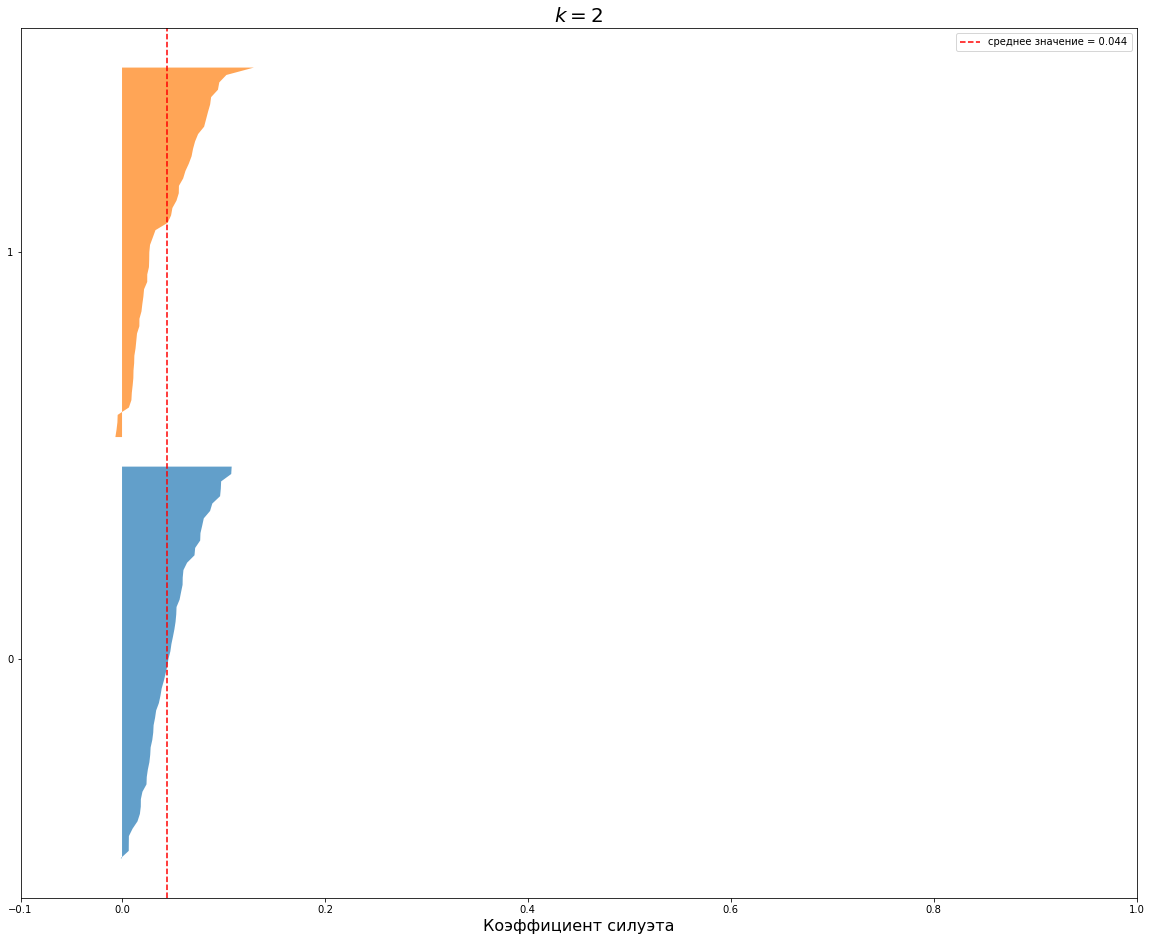

0.05656980298818871


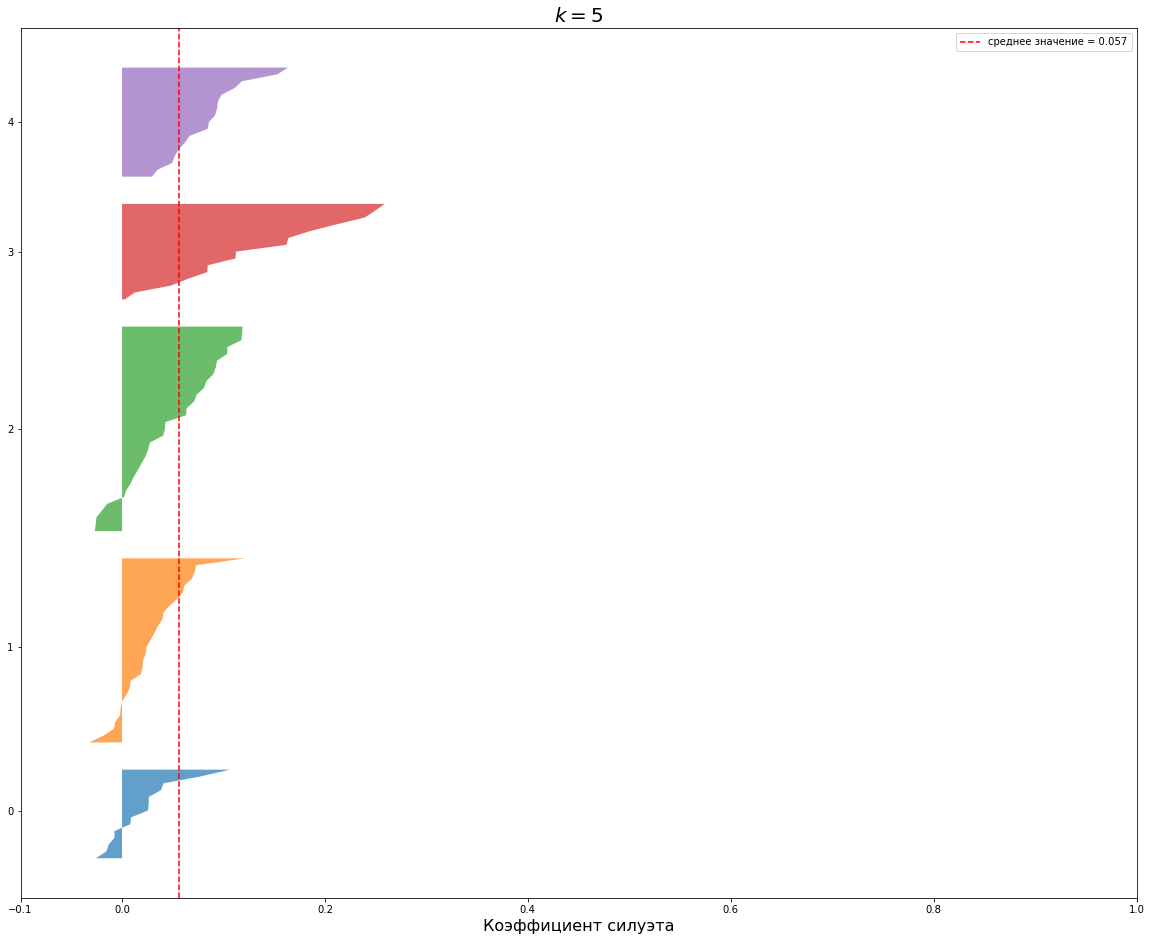

0.05178180418591407


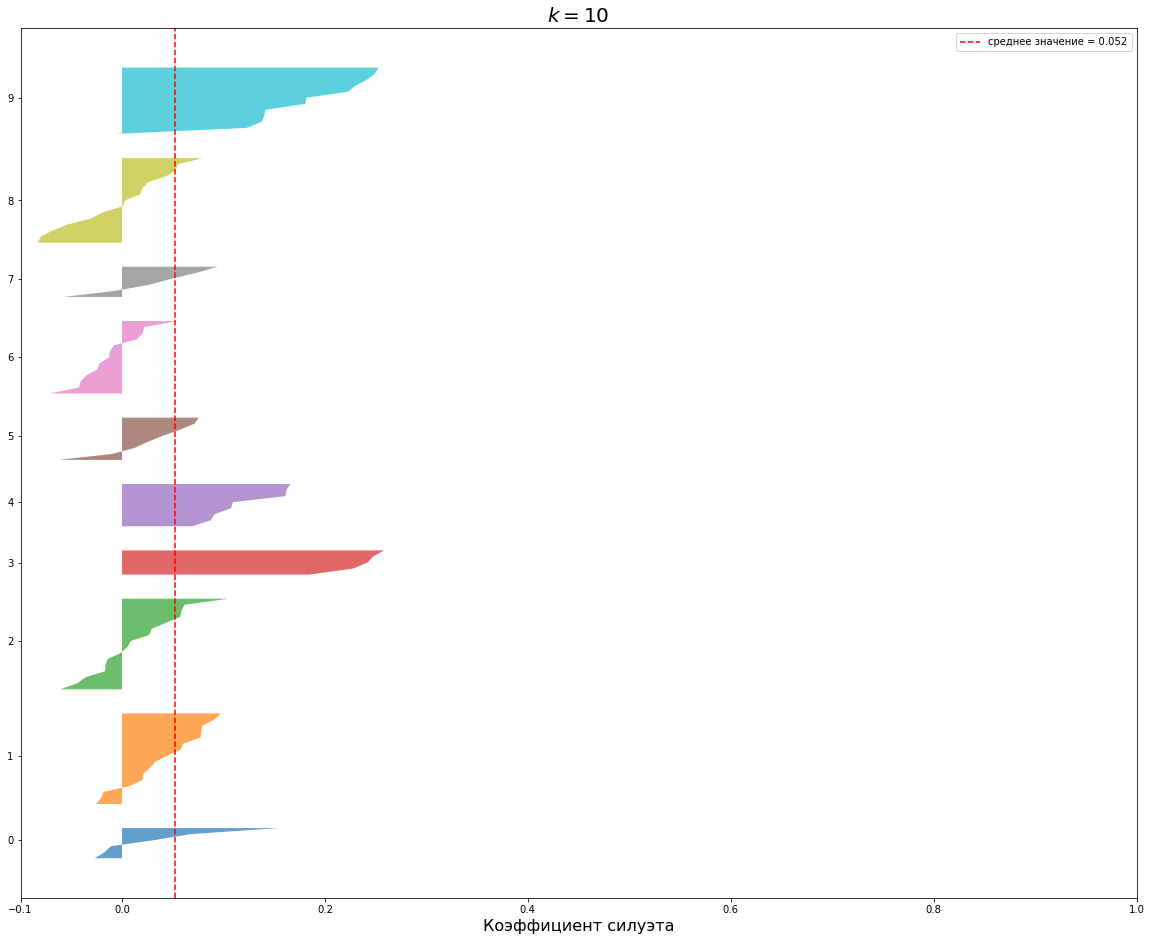

0.06382445584765857


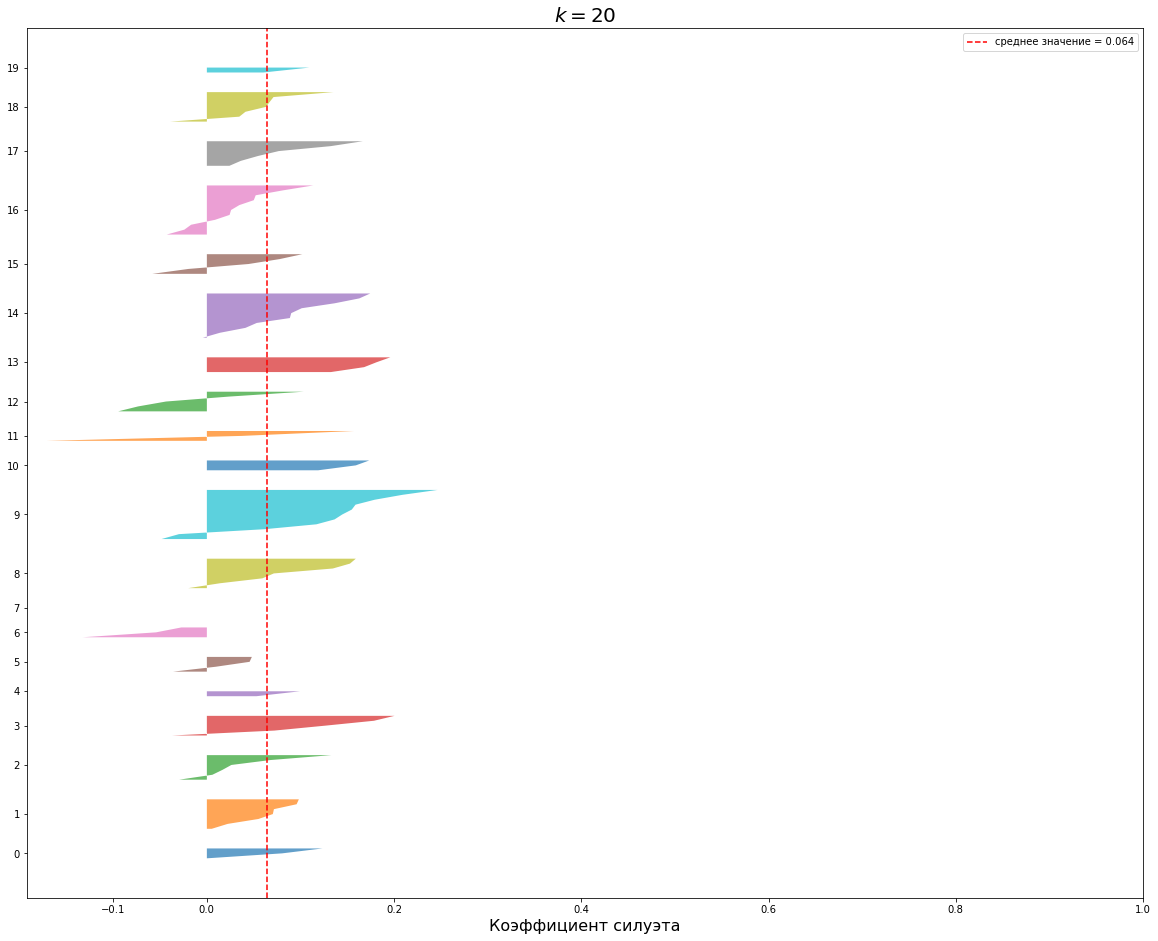

In [47]:

# График косинусных оценок силуэтов кластеров
for k in (2, 5, 10, 20):
    plt.figure(figsize=(20,16))
    
    centers, labels_cosine = find_clusters(reform_tfidf_matrix, k, 'cosine')
    y_pred = np.asarray(labels_cosine)
    
    silhouette_scores = silhouette_score(reform_tfidf_matrix, y_pred)
    silhouette_coefficients = silhouette_samples(reform_tfidf_matrix, labels_cosine)
    padding = len(reform_tfidf_matrix) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 30):
        plt.ylabel("Кластер", fontsize=16)
    
    if k in (2, 5, 10, 20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Коэффициент силуэта", fontsize=16)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores, color="red", linestyle="--", label = "среднее значение = {}".format(round(silhouette_scores, 3)))
    print(silhouette_scores)
    plt.title("$k={}$".format(k), fontsize=20)
    plt.legend()
    plt.show();

# Hierachical Clustering

In [51]:
def get_distant_matrix(normal_matrix):
  cos_dist = 1 - cosine_similarity(normal_matrix)
  mat_dist = pairwise_distances(normal_matrix, metric='manhattan') 
  ucl_dist = pairwise_distances(normal_matrix, metric='euclidean') 
  return cos_dist, mat_dist, ucl_dist
cos_dist, mat_dist, ucl_dist = get_distant_matrix(tfidf_matrix)

In [52]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np


clustering1 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='complete').fit(reform_tfidf_matrix)
print(clustering1)

print(len(clustering1.labels_))
print(clustering1.labels_[:5])


clustering2 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='average').fit(reform_tfidf_matrix)
print(clustering2)

print(len(clustering2.labels_))
print(clustering2.labels_[:5])


clustering3 = AgglomerativeClustering(affinity='euclidean', n_clusters=20, linkage='single').fit(reform_tfidf_matrix)
print(clustering3)

AgglomerativeClustering(linkage='complete', n_clusters=20)
105
[ 5 11  6  3 11]
AgglomerativeClustering(linkage='average', n_clusters=20)
105
[12  2 18  3  2]
AgglomerativeClustering(linkage='single', n_clusters=20)


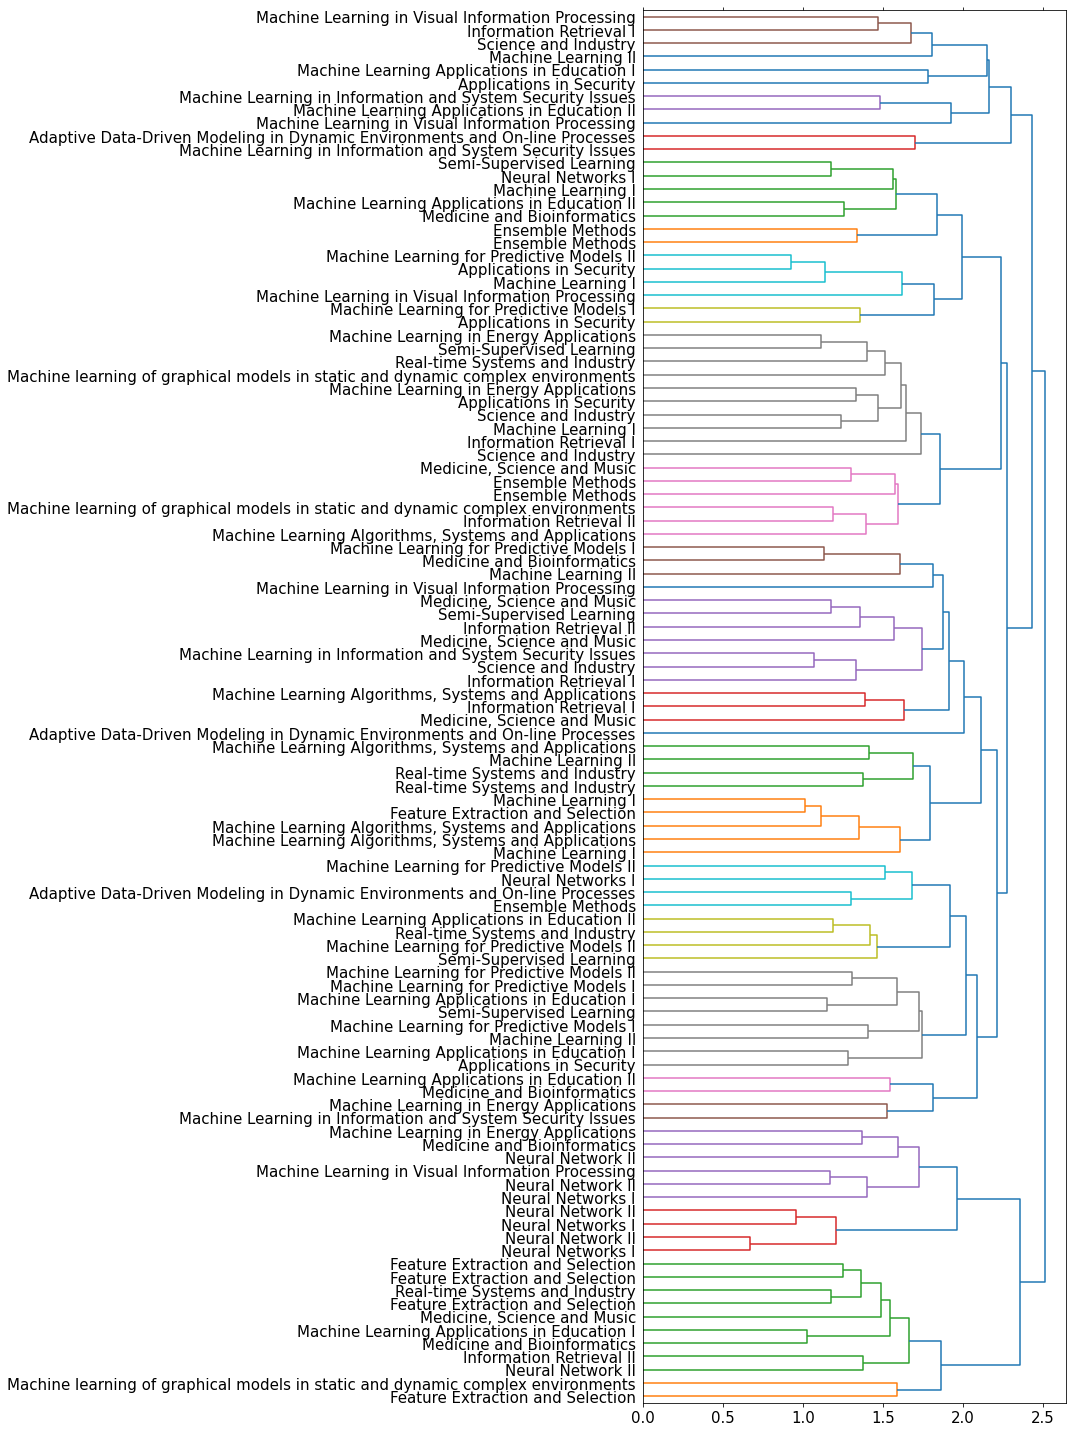

In [53]:
linkage_matrix = average(cos_dist) 
linkage_matrix.shape


fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels= list(papers['session']));

plt.tick_params(\
    axis= 'x',        
    which='both',     
    bottom='off',      
    top='off',         
    labelbottom='off',
    labelsize=15
    )
plt.tick_params(\
    axis= 'y',         
    labelsize=15
    )

plt.tight_layout() 


plt.savefig('ward_clusters.png', dpi=200) ;

# DBSCAN 

In [55]:
def get_eps(data, min_s, metric, plot = False):
  k = min_s  


  neybor = NearestNeighbors(n_neighbors=k, metric=metric)
  neybor.fit(data)
  
  distan, ind = neybor.kneighbors(data)
 
  distan = list(distan[:,-1])

  distan.sort(reverse = True)
  ind = range(1, len(distan)+1)


  kn = KneeLocator(ind, distan, curve='convex', direction='decreasing')

  if plot == True:
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.plot(ind, distan)
    plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.show(); 

  return kn.knee_y

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 



dbscan1 = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "manhattan"), min_samples=3, metric="manhattan")
dbscan1.fit(reform_tfidf_matrix)

dbscan2 = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "euclidean"), min_samples=3, metric="euclidean")
dbscan2.fit(reform_tfidf_matrix)

dbscan3 = DBSCAN(eps= get_eps(reform_tfidf_matrix, 3, "cosine"), min_samples=3, metric="cosine")
dbscan3.fit(reform_tfidf_matrix)

print("Количество кластеров", len(set(dbscan1.labels_)))
print("Количество кластеров", len(set(dbscan2.labels_)))
print("Количество кластеров", len(set(dbscan3.labels_)))

Количество кластеров 2
Количество кластеров 2
Количество кластеров 2


# Ассоциативные правила

In [62]:
from Eclat import Eclat

In [63]:
papers["keywords_abstract"]

paper_id
1      statistical word alignment, ensemble learning,...
2      representation, spectral learning, discrete Fo...
3      Software defect prediction, Particle swarm opt...
4      filtering, label noise, instance weighting Not...
5      Twitter, Adaptation models, Time-frequency ana...
                             ...                        
101    Blind source seperation, face recognition, fea...
102    target detection, computer vision, statistical...
103    spatio-temporal data, causal discovery, graphi...
104    the lasso estimate, Wind turbine, pitch system...
105    drug-design, Machine learning, feature selecti...
Name: keywords_abstract, Length: 105, dtype: object

In [61]:
reform_tfidf_matrix

array([[0.        , 0.32117619, 0.        , ..., 0.31259345, 0.33093288,
        0.        ],
       [0.        , 0.12013917, 0.        , ..., 0.        , 0.09284157,
        0.17539306],
       [0.24552731, 0.34184274, 0.        , ..., 0.        , 0.26417043,
        0.        ],
       ...,
       [0.        , 0.17981658, 0.27147124, ..., 0.        , 0.27791857,
        0.        ],
       [0.26171978, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.48175335, ..., 0.        , 0.        ,
        0.46586322]])

In [64]:
model = Eclat(min_support = 0.01, max_items = 4, min_items = 3)

In [66]:
model.fit(papers)

In [67]:
model.transform()

{'M | e | v': '21.9048%',
 'M | e | v | r': '21.9048%',
 'M | e | v | b': '10.4762%',
 'M | e | v | f': '19.0476%',
 'M | e | v | U': '6.6667%',
 'M | e | v | a': '20.9524%',
 'M | e | v | d': '20.9524%',
 'M | e | v | H': '4.7619%',
 'M | e | v | u': '19.0476%',
 'M | e | v | ': '21.9048%',
 'M | e | v | W': '1.9048%',
 'M | e | v | n': '21.9048%',
 'M | e | v | t': '21.9048%',
 'M | e | v | p': '15.2381%',
 'M | e | v | i': '21.9048%',
 'M | e | v | A': '13.3333%',
 'M | e | v | E': '7.6190%',
 'M | e | v | o': '21.9048%',
 'M | e | v | g': '21.9048%',
 'M | e | v | c': '21.9048%',
 'M | e | v | l': '20.0000%',
 'M | e | v | S': '14.2857%',
 'M | e | v | s': '21.9048%',
 'M | e | v | m': '19.0476%',
 'M | e | v | I': '9.5238%',
 'M | e | v | R': '10.4762%',
 'M | e | v | y': '12.3810%',
 'M | e | v | L': '13.3333%',
 'M | e | v | w': '5.7143%',
 'M | e | v | F': '1.9048%',
 'M | e | v | C': '15.2381%',
 'M | e | v | h': '15.2381%',
 'M | e | v | T': '6.6667%',
 'M | e | v | P': '9.52